# Pymaceuticals Inc.
---

### Analysis

- In this comprehensive analysis, the data of a pioneering pharmaceutical company specializing in anti-cancer medications has been meticulously examined. The primary objective of this study was to meticulously assess the efficacy of Pymaceuticals’ premier drug, Capomulin, against a spectrum of alternative treatment regimens.

Remarkably, the analysis revealed that Capomulin exhibited the second lowest mean tumor volume among all treatments, trailing only behind Propriva. Furthermore, a striking correlation coefficient of 0.84 was observed between the average tumor volume and the weight of mice subjected to the Capomulin regimen. This finding underscores the significant impact of Capomulin on tumor reduction, highlighting its potential as an effective cancer treatment.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID'])

# Display the data table for preview
mouse_study_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
number_of_mice = len(pd.unique(mouse_study_complete['Mouse ID']))
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_array = mouse_study_complete.loc[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

print(duplicate_mice_array)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = mouse_study_complete[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_study_df = mouse_study_complete[mouse_study_complete['Mouse ID'].isin(duplicate_mice_array) == False]
cleaned_mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(cleaned_mouse_study_df['Mouse ID']))

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_mean = cleaned_mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()

tumor_volume_median = cleaned_mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()

tumor_volume_variance = cleaned_mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()

tumor_volume_std = cleaned_mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()

tumor_volume_sem = cleaned_mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistic_table = pd.DataFrame({
    'Mean Tumor Volume': tumor_volume_mean,
    'Median Tumor Volume': tumor_volume_median,
    'Tumor Volume Variance': tumor_volume_variance,
    'Tumor Volume Std. Dev.': tumor_volume_std,
    'Tumor Volume Std. Err.': tumor_volume_sem
}, index = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'])

summary_statistic_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

drug_regimens = cleaned_mouse_study_df['Drug Regimen'].unique()

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistic_table_agg = cleaned_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns for clarity
summary_statistic_table_agg.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Set the index of the summary statistics table using the unique drug regimen values
summary_statistic_table_agg.index = drug_regimens

summary_statistic_table_agg


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ketapril,52.591172,51.776157,39.290177,6.268188,0.469821
Naftisol,52.884795,51.820584,43.128684,6.567243,0.492236
Infubinol,55.235638,53.698743,68.553577,8.279709,0.603860
Stelasyn,54.331565,52.509285,66.173479,8.134708,0.596466
Ramicane,54.033581,52.288934,61.168083,7.821003,0.581331
Zoniferol,52.320930,50.446266,43.852013,6.622085,0.544332
Propriva,40.216745,40.673236,23.486704,4.846308,0.320955
Placebo,54.233149,52.431737,59.450562,7.710419,0.573111
Ceftamin,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

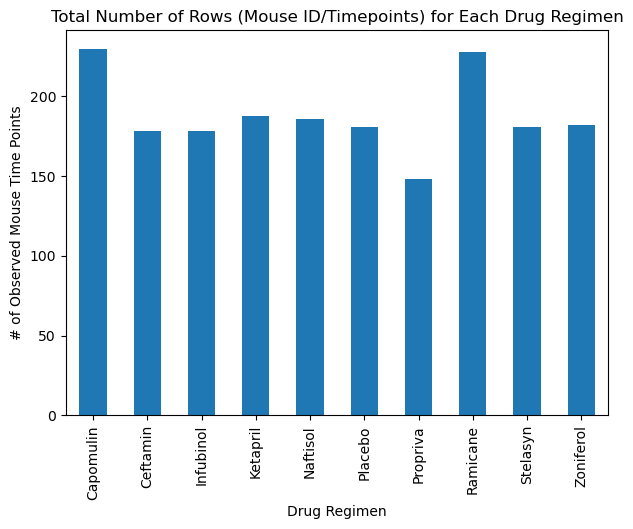

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group by 'Drug Regimen' and count the number of rows for each group
drug_regime_and_timepoint = cleaned_mouse_study_df.groupby('Drug Regimen').size()

# Use DataFrame.plot() in order to create a bar chart of the data
drug_regime_and_timepoint.plot(kind="bar", figsize=(7, 5))

# Set a title for the chart
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Time Points')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')

plt.show()
plt.tight_layout()

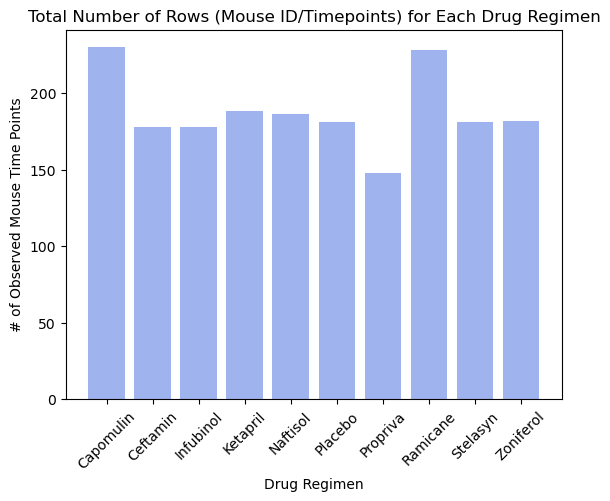

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
timepoint_count = cleaned_mouse_study_df.groupby('Drug Regimen').size()

# Plotting the bar chart
plt.bar(timepoint_count.index, timepoint_count.values, alpha=0.5, color='royalblue')

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Time Points')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

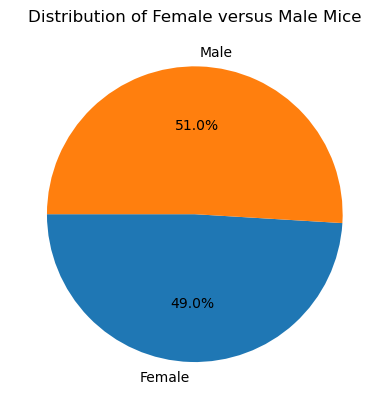

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_distribution = cleaned_mouse_study_df.groupby('Sex').size()

# Plotting the pie chart
sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=180)

# Adding title
plt.title('Distribution of Female versus Male Mice')

plt.show()

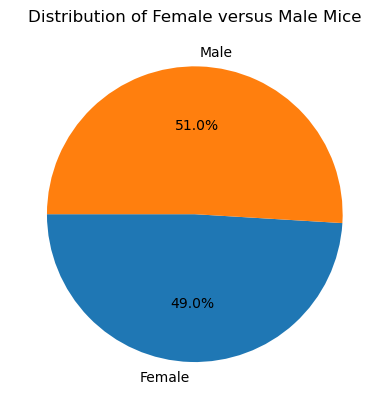

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_distribution.index

plt.pie(sex_distribution, labels=labels, autopct="%1.1f%%",startangle=180)

plt.title('Distribution of Female versus Male Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the DataFrame to include only the specified treatment regimens
filtered_df = cleaned_mouse_study_df[cleaned_mouse_study_df['Drug Regimen'].isin(treatment_regimens)]

# Get the last (greatest) timepoint for each mouse
final_tumor_volume = filtered_df.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

updated_mouse_study = pd.merge(cleaned_mouse_study_df, final_tumor_volume, on=['Mouse ID'])

updated_mouse_study = updated_mouse_study.rename(columns={'Timepoint_x': 'Timepoint', 'Timepoint_y': 'Last Timepoint'})

updated_mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
809,m601,25,33.118756,1,Capomulin,Male,22,17,45
810,m601,30,31.758275,1,Capomulin,Male,22,17,45
811,m601,35,30.834357,1,Capomulin,Male,22,17,45
812,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [60]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment regimen
for drug in treatment_regimens:
    # Filter the merged DataFrame for the current drug
    drug_data = updated_mouse_study[updated_mouse_study['Drug Regimen'] == drug]
    
    # Filter the data based on the 'Last Timepoint' column
    final_tumor_volumes = drug_data.loc[drug_data['Timepoint'] == drug_data['Last Timepoint'], 'Tumor Volume (mm3)']
    
    # Append tumor volume data to the list
    tumor_vol_data.append(final_tumor_volumes.tolist())

# Calculate the IQR and determine potential outliers for each treatment regimen
for i, drug in enumerate(treatment_regimens):
    # Calculate quartiles for the current treatment regimen
    quartiles = pd.Series(tumor_vol_data[i]).quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Calculate lower and upper bounds for outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Check for potential outliers
    potential_outliers = [x for x in tumor_vol_data[i] if x < lower_bound or x > upper_bound]

    # Print results
    print(f'{drug} potential outliers are less than {lower_bound} and more than {upper_bound}: {potential_outliers}')

Capomulin potential outliers are less than 20.70456164999999 and more than 51.83201549: []
Ramicane potential outliers are less than 17.912664470000003 and more than 54.30681135: []
Infubinol potential outliers are less than 36.83290494999999 and more than 82.74144559000001: [36.3213458]
Ceftamin potential outliers are less than 25.355449580000002 and more than 87.66645829999999: []


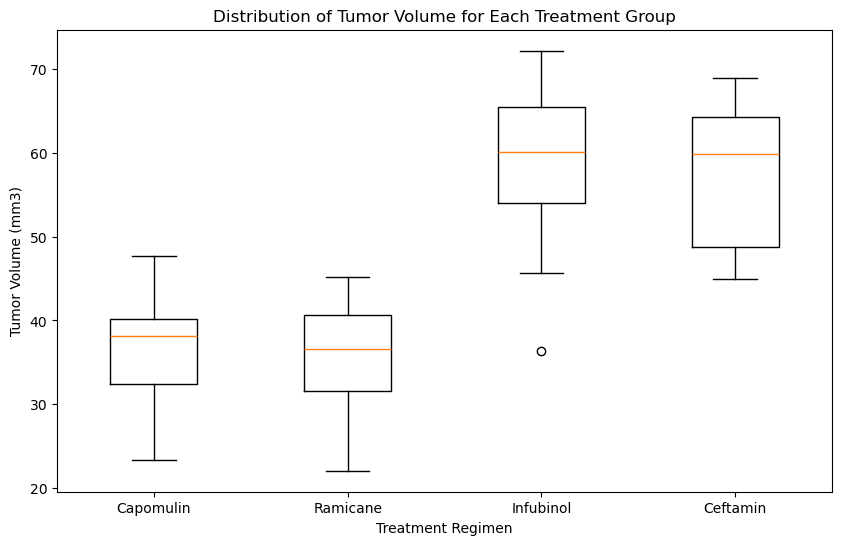

In [61]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))

# Plot the box plot
plt.boxplot(tumor_vol_data, labels=treatment_regimens)

# Add labels and title
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot
plt.show()

## Line and Scatter Plots

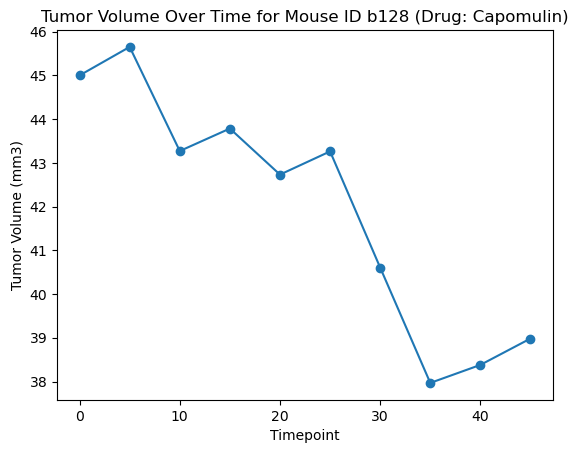

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Specify the ID and drug for which you want to plot the data
selected_id = 'b128'
selected_drug = 'Capomulin'

# Filter the DataFrame for the specific ID and drug
filtered_data = cleaned_mouse_study_df[(cleaned_mouse_study_df['Mouse ID'] == selected_id) & (cleaned_mouse_study_df['Drug Regimen'] == selected_drug)]

# Extract timepoints and tumor volumes
timepoints = filtered_data['Timepoint']
tumor_volumes = filtered_data['Tumor Volume (mm3)']

# Plot the line graph
plt.plot(timepoints, tumor_volumes, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume Over Time for Mouse ID {selected_id} (Drug: {selected_drug})')

# Display the plot
plt.show()

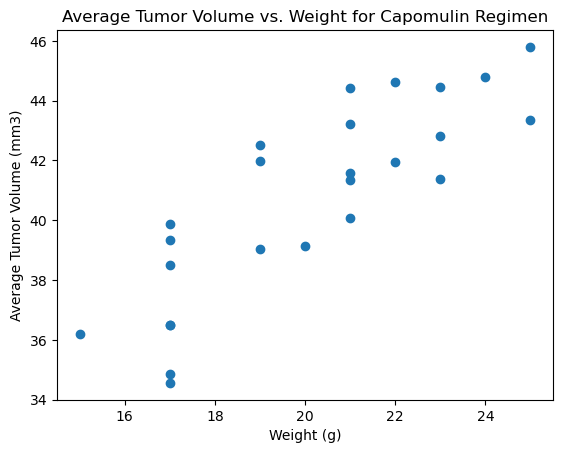

In [66]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the DataFrame for the Capomulin regimen
capomulin_data = cleaned_mouse_study_df[cleaned_mouse_study_df['Drug Regimen'] == 'Capomulin']

# Group by 'Weight (g)' and calculate the mean tumor volume
avg_tumor_volume = capomulin_data.groupby(['Mouse ID'])[['Tumor Volume (mm3)', 'Weight (g)']].mean()


# Plot the scatter plot
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], marker='o')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title(f'Average Tumor Volume vs. Weight for {selected_drug_regimen} Regimen')

# Display the plot
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


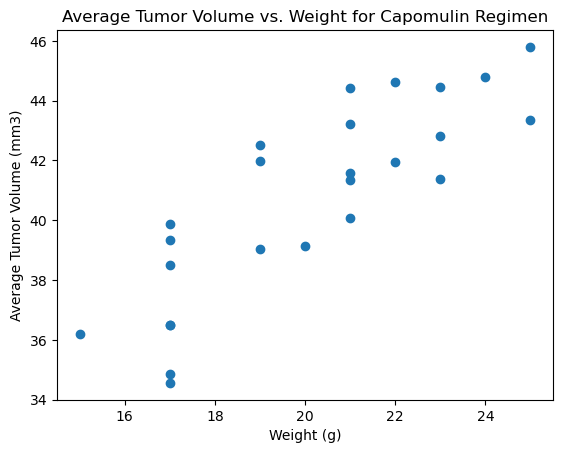

In [71]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], marker='o')

model = st.linregress(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title(f'Average Tumor Volume vs. Weight for {selected_drug_regimen} Regimen')

# Display the plot
plt.show()